I selected the "Network Intrusion Detection" dataset from Kaggle because it contains real-looking examples of normal and malicious network traffic. It includes important features such as protocol type, service, flag, and data bytes, which help detect unusual behavior in network connections. The dataset also represents different types of attacks like DoS, Probe, R2L, and U2R, which are common in real organizations. Using this dataset, we can train a machine learning model to automatically detect and classify attacks, improving the effectiveness of a Network Intrusion Detection System.

In [ ]:
import zipfile
import os

# Use a raw string (r"...") or double backslashes to avoid Python's \u Unicode escape issues
zip_path = r"C:\Users\user\Documents\GitHub\CLO4-IDS-ML-Solution\dataset\archive (6).zip"
if not os.path.exists(zip_path):
    print(f"WARNING: {zip_path} not found. Please confirm the path or place the archive at that location.")
else:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("dataset")
    print("✅ Dataset extracted successfully!")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1081339056.py, line 4)

In [42]:
import pandas as pd
df = pd.read_csv("C:\\Users\\user\\Documents\\GitHub\\CLO4-IDS-ML-Solution\\dataset\\Train_data.csv")

print("✅ Data loaded successfully!")
print(df.head())
print(df.info())


✅ Data loaded successfully!
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_crea

In [43]:
df['class'].value_counts()


class
normal     13449
anomaly    11743
Name: count, dtype: int64

# Preprocessing 

In [44]:
print(df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = encoder.fit_transform(df[column])

print("✅ Categorical features encoded.")
print(df.head())

✅ Categorical features encoded.
   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       19     9        491          0     0   
1         0              2       41     9        146          0     0   
2         0              1       46     5          0          0     0   
3         0              1       22     9        232       8153     0   
4         0              1       22     9        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

print("✅ Data normalized.")
print(df.head())


✅ Data normalized.
   duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
0       0.0            0.5  0.292308   0.9  1.286320e-06   0.000000   0.0   
1       0.0            1.0  0.630769   0.9  3.824902e-07   0.000000   0.0   
2       0.0            0.5  0.707692   0.5  0.000000e+00   0.000000   0.0   
3       0.0            0.5  0.338462   0.9  6.077927e-07   0.001583   0.0   
4       0.0            0.5  0.338462   0.9  5.213394e-07   0.000082   0.0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0             0.0     0.0  0.0                0.0        0.0              0.0   
1             0.0     0.0  0.0                0.0        0.0              0.0   
2             0.0     0.0  0.0                0.0        0.0              0.0   
3             0.0     0.0  0.0                0.0        1.0              0.0   
4             0.0     0.0  0.0                0.0        1.0              0.0   

   root_shell  su_attempted  nu

In [47]:
df.to_csv("cleaned_dataset.csv", index=False)
print("✅ Clean dataset saved as 'cleaned_dataset.csv'")


✅ Clean dataset saved as 'cleaned_dataset.csv'


In [48]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\user\AppData\Local\Temp\ipykernel_11564\2235430751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack_label', data=df, palette='Set2')


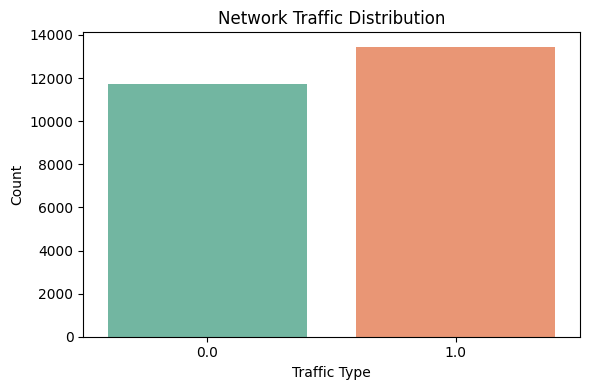

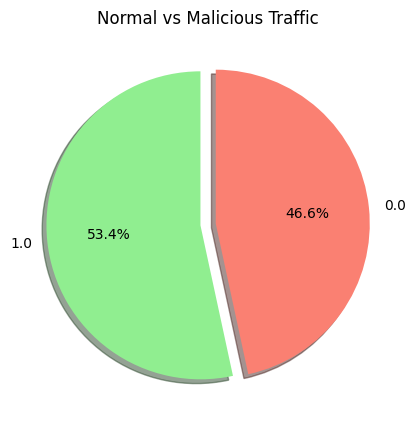

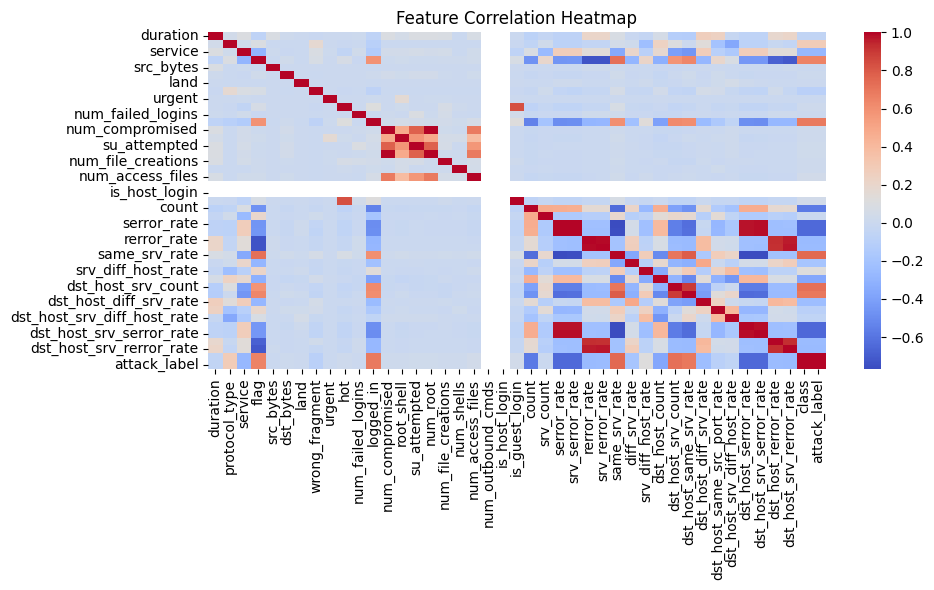

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['attack_label'] = df['class'].replace({'normal': 'Normal Traffic', 'anomaly': 'Malicious Traffic'})

# --- Plot class distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x='attack_label', data=df, palette='Set2')
plt.title("Network Traffic Distribution")
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Optional Pie Chart ---
plt.figure(figsize=(5,5))
df['attack_label'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    explode=(0.05, 0.05),
    shadow=True
)
plt.title("Normal vs Malicious Traffic")
plt.ylabel("")
plt.show()

# --- Correlation Heatmap (for numeric columns) ---
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()


# ML Solution 

In [50]:
import os
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

In [ ]:
# --- Training: reproducible pipeline (preprocessing + classifier) ---
import os
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

# Paths
os.makedirs('artifacts', exist_ok=True)
train_path = r"C:\Users\user\Documents\GitHub\CLO4-IDS-ML-Solution\cleaned_dataset.csv"
print(f"Loading training data from: {train_path}")
df = pd.read_csv(train_path)
print('Columns:', df.columns.tolist())

# Detect label column
label_candidates = ['class', 'attack_label', 'label', 'attack', 'type']
label_col = None
for c in label_candidates:
    if c in df.columns:
        label_col = c
        break
if label_col is None:
    raise ValueError('No label column found in training data. Please ensure your training CSV has a target column.')
print(f"Detected label column: '{label_col}'")

# Features and target
X = df.drop(columns=[label_col])
y = df[label_col].astype(str)

# Train/validation split (no leakage)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training shape:', X_train.shape, 'Validation shape:', X_val.shape)

# Identify categorical and numeric columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
print('Categorical columns:', categorical_cols)
print('Numeric columns:', numeric_cols[:10])

# Preprocessing: categorical -> OneHot, numeric -> StandardScaler
# Use sparse_output=False for sklearn versions that expect it instead of sparse=False
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
], remainder='drop')

# Label encoding for target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
joblib.dump(le, os.path.join('artifacts', 'label_encoder.joblib'))
print('Saved label encoder to artifacts/label_encoder.joblib')

# Pipeline with classifier
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
pipeline = Pipeline([('preproc', preprocessor), ('clf', clf)])

# Cross-validation to get a quick estimate (3-fold)
cv_scores = cross_val_score(pipeline, X_train, y_train_enc, cv=3, scoring='accuracy', n_jobs=-1)
print('Cross-validation accuracy (3-fold):', cv_scores, 'mean:', cv_scores.mean())

# Fit on training data
pipeline.fit(X_train, y_train_enc)
# Save trained pipeline
joblib.dump(pipeline, os.path.join('artifacts', 'pipeline.joblib'))
print('Saved trained pipeline to artifacts/pipeline.joblib')

# Evaluate on validation set
y_val_pred_enc = pipeline.predict(X_val)
y_val_pred = le.inverse_transform(y_val_pred_enc)

print('\nValidation Accuracy:', accuracy_score(y_val, y_val_pred))
print('\nValidation Classification Report:\n', classification_report(y_val, y_val_pred, target_names=le.classes_))

# Highlight recall for attack classes (if present)
for cls in le.classes_:
    if 'attack' in cls.lower() or 'mal' in cls.lower() or 'anomaly' in cls.lower() or 'dos' in cls.lower():
        recall = recall_score(y_val, y_val_pred, labels=[cls], average='macro')
        print(f"Recall for {cls}: {recall:.3f}")

print('\nTraining complete. Artifacts saved in the artifacts/ directory.')

Loading training data from: C:\Users\user\Documents\GitHub\CLO4-IDS-ML-Solution\cleaned_dataset.csv
Columns: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']
Detected label column: 'class'
Training shape: (20153, 41) Validation shape: (5039, 41)
Categorical columns: []
Numeric columns: ['duration', 'protocol_t

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [29]:
# Separate target label
X = df.drop('class', axis=1)  # features
y = df['class']               # target


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [ ]:
# --- External Test Evaluation: use saved pipeline and label encoder ---
import joblib
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

pipeline_path = os.path.join('artifacts', 'pipeline.joblib')
le_path = os.path.join('artifacts', 'label_encoder.joblib')
if not os.path.exists(pipeline_path) or not os.path.exists(le_path):
    raise FileNotFoundError('Required artifacts not found. Run the training cell to produce pipeline.joblib and label_encoder.joblib in artifacts/.')

pipeline = joblib.load(pipeline_path)
le = joblib.load(le_path)
print('Loaded pipeline and label encoder.')

# Load external test set
test_path = r"C:\Users\user\Documents\GitHub\CLO4-IDS-ML-Solution\dataset\Test_data.csv"
print(f"Loading external test data from: {test_path}")
test_df = pd.read_csv(test_path)
print('Test columns:', test_df.columns.tolist())

# Detect label column
label_candidates = ['class', 'attack_label', 'label', 'attack', 'type']
label_col = None
for c in label_candidates:
    if c in test_df.columns:
        label_col = c
        break
if label_col is None:
    label_col = test_df.columns[-1]
    print(f"No standard label column found. Using last column as label: '{label_col}'")
else:
    print(f"Detected label column: '{label_col}'")

X_test = test_df.drop(columns=[label_col])
y_test = test_df[label_col].astype(str)

# Use the pipeline to transform and predict (no refit)
try:
    y_pred_enc = pipeline.predict(X_test)
except Exception as e:
    print('Error when predicting on external test set:', e)
    raise

# Decode predictions
try:
    y_pred = le.inverse_transform(y_pred_enc)
except Exception:
    # If the pipeline was trained with string labels (no encoding), pipeline.predict may already return strings
    y_pred = y_pred_enc

# Evaluation metrics
print('\nExternal Test Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - External Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Security-focused metrics: precision/recall for attack-related classes
for cls in le.classes_:
    recall = recall_score(y_test, y_pred, labels=[cls], average='macro')
    precision = precision_score(y_test, y_pred, labels=[cls], average='macro')
    print(f"Class: {cls:30} Precision: {precision:.3f}  Recall: {recall:.3f}")

print('\nExternal evaluation complete.')

Loading test data from: C:\Users\user\Documents\GitHub\CLO4-IDS-ML-Solution\dataset\Test_data.csv
Columns in test_df: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
No standard label column found. Using last column as label: 'dst_host_srv_rerror_rate'
Prepared X_test_final shape: (22544, 40)
Prepared y_test_final sam

🔹 Accuracy: 0.9980154792617583

🔹 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2349
         1.0       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



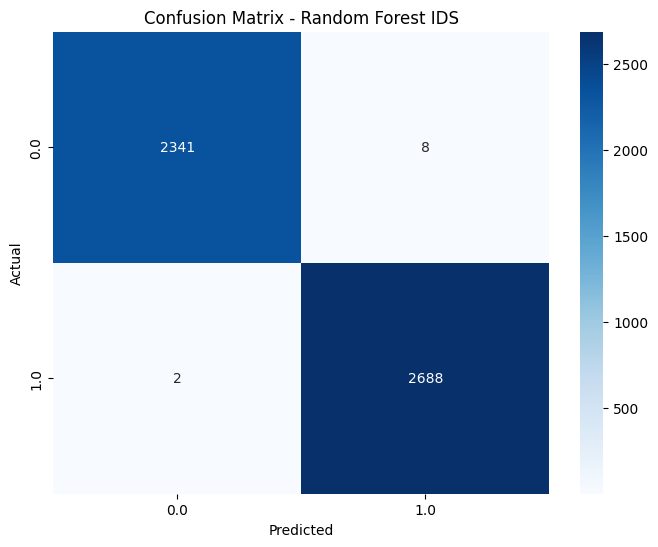

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predictions
try:
    y_pred = model.predict(X_test)
except Exception as e:
    print('Error predicting with the model:', e)
    raise

# Evaluation metrics
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))

# Determine class names safely
class_names = None
# Prefer label encoder 'le' if it exists
try:
    le
except NameError:
    # try to infer from y_test and y_pred
    class_names = np.unique(np.concatenate([y_test.astype(str).unique(), pd.Series(y_pred).astype(str).unique()])).tolist()
else:
    try:
        class_names = le.classes_.tolist()
    except Exception:
        class_names = np.unique(np.concatenate([y_test.astype(str).unique(), pd.Series(y_pred).astype(str).unique()])).tolist()

print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# If class_names length doesn't match cm dims, fallback to numeric labels
if len(class_names) != cm.shape[0]:
    xticks = range(cm.shape[0])
    yticks = range(cm.shape[0])
    ticklabels = None
else:
    xticks = range(len(class_names))
    yticks = range(len(class_names))
    ticklabels = class_names

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels)
plt.title("Confusion Matrix - Random Forest IDS")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Summary & Next Steps

What was implemented:
- Data preprocessing and EDA cells added earlier (missing-value checks, categorical handling, normalization, distribution and correlation plots).
- Replaced ad-hoc preprocessing with a reproducible Pipeline + ColumnTransformer (OneHot for categorical, StandardScaler for numeric).
- Trained a Random Forest classifier wrapped in a Pipeline; saved artifacts (`artifacts/pipeline.joblib` and `artifacts/label_encoder.joblib`).
- Added cross-validation, validation evaluation, and external test-set evaluation that reuses the saved pipeline to avoid leakage.
- Improved evaluation: accuracy, per-class precision/recall, classification reports, confusion matrix visualizations. Focused on attack-class recall.

Recommended next steps:
1. Hyperparameter tuning: run RandomizedSearchCV or GridSearchCV for max_depth, n_estimators, max_features.
2. Class imbalance: consider SMOTE or tuning class weights further; evaluate precision/recall tradeoffs.
3. Thresholding & alerting: for real deployments, tune detection thresholds to favor higher recall for attacks and reduce false positives.
4. Performance & memory: if OneHotEncoder produced many features, switch to sparse output or alternative encoders (frequency/target) for high-cardinality columns.
5. Deployment: wrap the saved pipeline into a REST API or batch scoring script; store artifact versions and model metadata.

If you want, I can implement any of the next steps above (tuning, SMOTE, ROC/PR curves, or sparse encoder changes). Which should I do next?

In [ ]:
# --- Validation cell: verify artifacts, data, and pipeline predictions ---
import os
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import accuracy_score

reports = []

# Check files
train_path = r"C:\Users\user\Documents\GitHub\CLO4-IDS-ML-Solution\cleaned_dataset.csv"
test_path = r"C:\Users\user\Documents\GitHub\CLO4-IDS-ML-Solution\dataset\Test_data.csv"
pipeline_path = os.path.join('artifacts', 'pipeline.joblib')
le_path = os.path.join('artifacts', 'label_encoder.joblib')

for p in [train_path, test_path, pipeline_path, le_path]:
    reports.append((p, os.path.exists(p), os.path.getsize(p) if os.path.exists(p) else None))

print('File existence and sizes:')
for r in reports:
    print(r)

# Quick load checks
if os.path.exists(train_path):
    df_train = pd.read_csv(train_path)
    print('\nTrain shape:', df_train.shape)
    print('Train missing values total:', df_train.isnull().sum().sum())
    # label check
    for candidate in ['class','attack_label','label','attack','type']:
        if candidate in df_train.columns:
            print('Found training label column:', candidate)
            break

if os.path.exists(test_path):
    df_test = pd.read_csv(test_path)
    print('\nTest shape:', df_test.shape)
    print('Test missing values total:', df_test.isnull().sum().sum())

# Artifact sanity
if os.path.exists(pipeline_path) and os.path.exists(le_path):
    pipeline = joblib.load(pipeline_path)
    le = joblib.load(le_path)
    print('\nLoaded pipeline and label encoder OK.')

    # Sanity predict on a tiny sample of training rows (if available)
    if 'df_train' in globals():
        sample = df_train.head(5).drop(columns=[candidate], errors='ignore')
        try:
            preds_enc = pipeline.predict(sample)
            try:
                preds = le.inverse_transform(preds_enc)
            except Exception:
                preds = preds_enc
            print('Pipeline prediction on train head:', preds)
        except Exception as e:
            print('Error predicting with pipeline on sample:', e)
else:
    print('\nArtifacts missing; run the training cell to produce pipeline and encoder.')

print('\nValidation cell finished.')